<a href="https://colab.research.google.com/github/eng-aomar/Security_in_practice/blob/main/security_in_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adherence to Secure Software Development Lifecycle

---
This Notebook is associated with the paper "Adherence to Secure Software Development Lifecycle", it contains the dataset visualization for some of the demographic questions, in addition to other research questions. The visualization is done using Pandas, Matplotlib, Seaborn libraries.

By: Alaa' Omar


## Import Nessasry Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Libraries Versions

In [55]:
print(pd.__version__)
print(sns.__version__)

1.1.5
0.11.1


## Read Dataset csv File

In [5]:
df_responses= pd.read_csv('https://raw.githubusercontent.com/eng-aomar/Security_in_practice/main/secuirtyInPractice.csv')
df_responses.head()

,Timestamp,sex,years_of_experince,qualification,Specialization,job,team_size,sector,sef_rate_security,Apply Software Requirements,Apply Data Classification Scheme,Apply Threat Modeling,Document Technical Stack,Apply Secure Coding Standards,Perform Security Testing,Perform Penetration Testing,Perform Security Review,Publish Operations Guide,Track Vulnerabilities,Improve Development Process,Perform Security Training,What is the software development methodology used in your current project? ما هي منهجية تطوير البرمجيات المستخدمة في مشروعك الحالي؟,What type of development do you do? ما هو نوع التطوير الذي تقوم به؟,What are your main priorities when doing development? ما هي أولوياتك الرئيسية عند القيام بالتطوير؟,Do your priorities change when a deadline approaches? هل تتغير أولوياتك عندما يقترب الموعد النهائي؟,How does security fit in your priorities? كيف يتناسب أمن البرمجيات مع أولوياتك؟,"Do you apply Security Tooling? If yes, What tools do you use? and in which SDLC phase? هل تطبق أدوات الأمن؟ إذا كانت الإجابة بنعم ، فما هي الأدوات التي تستخدمها؟ وفي أي مرحلة من مراحل تطوير البرمجيات؟"
0,31/03/2021 22:17:59,Female,4,Master,Software engineering,Junior developer,3,Private Sector القطاع الخاض,1,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Once in the Project,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Agile,Web Development,Quality,No,Top priority,No
1,31/03/2021 23:29:12,Female,3,Bachelor,Computer engineering,Programmer,5,Educational Organization المؤسسات التعليمية,1,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Agile,Web Development,Understand the gathered requirements and prior...,i try to deliver the most priority requirement...,I always focus on making sure that the systems...,No
2,01/04/2021 22:01:46,Female,6,Bachelor,Computer engineering,software developer,5,Private Sector القطاع الخاض,3,Daily,Weekly,Monthly,Once in the Project,Weekly,Monthly,Quarterly,Quarterly,Quarterly,Quarterly,Monthly,Monthly,Scrum,Application Development,task done correctly from all aspects,yes,where ever needed,all stages
3,01/04/2021 22:03:44,Female,8,Bachelor,Software engineering,Senior Software Engineer,3,Private Sector القطاع الخاض,2,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Scrum,Web Development,To meet the requested functionality,No,It depends on the request,Using https in servers communicatios and encry...
4,01/04/2021 22:15:16,Female,6,Bachelor,Software engineering,Software Engineer,4,Private Sector القطاع الخاض,3,Once in the Project,Quarterly,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Annually,Not Applicable,Not Applicable,Not Applicable,Annually,Not Applicable,Scrum,Web Development,Build functionalities Without bugs.,No,It is the last priority specially when a deadl...,No


##Applying descriptive statistics 

---


The following code displays the rows, columns, data types, and memory used by
the dataframe:

In [7]:
df_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                    --------------  ----- 
 0   Timestamp                                                                                                                                                                                                 40 non-null     object
 1   sex                                                                                                                                                                                                       

Now, let's go one step deeper. We want to scan each column and highlight the maximum value and the minimum value in that column:

In [8]:
def highlightMax(s):
  isMax = s == s.max()
  return ['background-color: orange' if v else '' for v in isMax]
def highlightMin(s):
  isMin = s == s.min()
  return ['background-color: green' if v else '' for v in isMin]

We apply these two functions to the dataframe as follows:


In [10]:
df_responses.style.apply(highlightMax).apply(highlightMin).highlight_null(null_color='red')

,Timestamp,sex,years_of_experince,qualification,Specialization,job,team_size,sector,sef_rate_security,Apply Software Requirements,Apply Data Classification Scheme,Apply Threat Modeling,Document Technical Stack,Apply Secure Coding Standards,Perform Security Testing,Perform Penetration Testing,Perform Security Review,Publish Operations Guide,Track Vulnerabilities,Improve Development Process,Perform Security Training,What is the software development methodology used in your current project? ما هي منهجية تطوير البرمجيات المستخدمة في مشروعك الحالي؟,What type of development do you do? ما هو نوع التطوير الذي تقوم به؟,What are your main priorities when doing development? ما هي أولوياتك الرئيسية عند القيام بالتطوير؟,Do your priorities change when a deadline approaches? هل تتغير أولوياتك عندما يقترب الموعد النهائي؟,How does security fit in your priorities? كيف يتناسب أمن البرمجيات مع أولوياتك؟,"Do you apply Security Tooling? If yes, What tools do you use? and in which SDLC phase? هل تطبق أدوات الأمن؟ إذا كانت الإجابة بنعم ، فما هي الأدوات التي تستخدمها؟ وفي أي مرحلة من مراحل تطوير البرمجيات؟"
0,31/03/2021 22:17:59,Female,4,Master,Software engineering,Junior developer,3,Private Sector القطاع الخاض,1,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Once in the Project,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Agile,Web Development,Quality,No,Top priority,No
1,31/03/2021 23:29:12,Female,3,Bachelor,Computer engineering,Programmer,5,Educational Organization المؤسسات التعليمية,1,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Agile,Web Development,Understand the gathered requirements and prioritize them,i try to deliver the most priority requirements and then work on the less priority,I always focus on making sure that the systems are opened to the right persons with the correct roles and authentications,No
2,01/04/2021 22:01:46,Female,6,Bachelor,Computer engineering,software developer,5,Private Sector القطاع الخاض,3,Daily,Weekly,Monthly,Once in the Project,Weekly,Monthly,Quarterly,Quarterly,Quarterly,Quarterly,Monthly,Monthly,Scrum,Application Development,task done correctly from all aspects,yes,where ever needed,all stages
3,01/04/2021 22:03:44,Female,8,Bachelor,Software engineering,Senior Software Engineer,3,Private Sector القطاع الخاض,2,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Scrum,Web Development,To meet the requested functionality,No,It depends on the request,Using https in servers communicatios and encrypting private data
4,01/04/2021 22:15:16,Female,6,Bachelor,Software engineering,Software Engineer,4,Private Sector القطاع الخاض,3,Once in the Project,Quarterly,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Annually,Not Applicable,Not Applicable,Not Applicable,Annually,Not Applicable,Scrum,Web Development,Build functionalities Without bugs.,No,It is the last priority specially when a deadline approaches.,No
5,01/04/2021 22:29:35,Female,5,Master,Computer science,programmer,1,Public Sector القطاع الحكومي,3,Once in the Project,Monthly,Monthly,Once in the Project,Monthly,Monthly,Monthly,Weekly,Monthly,Monthly,Weekly,Weekly,Agile,"Web Development, Web services","security, system performance, usability",No,for ensure that software continues to function and are safe from attacks,"sql injections, data encryption, input fitters"
6,01/04/2021 22:31:32,Female,10,Bachelor,Computer engineering,Sw team leader,7,Private Sector القطاع الخاض,3,Weekly,Not Applicable,Quarterly,Quarterly,Quarterly,Weekly,Weekly,Quarterly,Once in the Project,Daily,Weekly,Not Applicable,Agile,Automation testing,"Coverage of all test cases , performance and security Tes

10. Are you still not happy with your visualization? Let's try to use another Python
library called seaborn and provide a gradient to the table:


In [31]:
colorMap = sns.light_palette("pink", as_cmap=True)
styled = df_responses.style.background_gradient(cmap=colorMap)
styled

,Timestamp,sex,years_of_experince,qualification,Specialization,job,team_size,sector,sef_rate_security,Apply Software Requirements,Apply Data Classification Scheme,Apply Threat Modeling,Document Technical Stack,Apply Secure Coding Standards,Perform Security Testing,Perform Penetration Testing,Perform Security Review,Publish Operations Guide,Track Vulnerabilities,Improve Development Process,Perform Security Training,What is the software development methodology used in your current project? ما هي منهجية تطوير البرمجيات المستخدمة في مشروعك الحالي؟,What type of development do you do? ما هو نوع التطوير الذي تقوم به؟,What are your main priorities when doing development? ما هي أولوياتك الرئيسية عند القيام بالتطوير؟,Do your priorities change when a deadline approaches? هل تتغير أولوياتك عندما يقترب الموعد النهائي؟,How does security fit in your priorities? كيف يتناسب أمن البرمجيات مع أولوياتك؟,"Do you apply Security Tooling? If yes, What tools do you use? and in which SDLC phase? هل تطبق أدوات الأمن؟ إذا كانت الإجابة بنعم ، فما هي الأدوات التي تستخدمها؟ وفي أي مرحلة من مراحل تطوير البرمجيات؟"
0,31/03/2021 22:17:59,Female,4,Master,Software engineering,Junior developer,3,Private Sector القطاع الخاض,1,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Once in the Project,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Agile,Web Development,Quality,No,Top priority,No
1,31/03/2021 23:29:12,Female,3,Bachelor,Computer engineering,Programmer,5,Educational Organization المؤسسات التعليمية,1,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Once in the Project,Once in the Project,Once in the Project,Not Applicable,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Agile,Web Development,Understand the gathered requirements and prioritize them,i try to deliver the most priority requirements and then work on the less priority,I always focus on making sure that the systems are opened to the right persons with the correct roles and authentications,No
2,01/04/2021 22:01:46,Female,6,Bachelor,Computer engineering,software developer,5,Private Sector القطاع الخاض,3,Daily,Weekly,Monthly,Once in the Project,Weekly,Monthly,Quarterly,Quarterly,Quarterly,Quarterly,Monthly,Monthly,Scrum,Application Development,task done correctly from all aspects,yes,where ever needed,all stages
3,01/04/2021 22:03:44,Female,8,Bachelor,Software engineering,Senior Software Engineer,3,Private Sector القطاع الخاض,2,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Scrum,Web Development,To meet the requested functionality,No,It depends on the request,Using https in servers communicatios and encrypting private data
4,01/04/2021 22:15:16,Female,6,Bachelor,Software engineering,Software Engineer,4,Private Sector القطاع الخاض,3,Once in the Project,Quarterly,Not Applicable,Once in the Project,Not Applicable,Not Applicable,Annually,Not Applicable,Not Applicable,Not Applicable,Annually,Not Applicable,Scrum,Web Development,Build functionalities Without bugs.,No,It is the last priority specially when a deadline approaches.,No
5,01/04/2021 22:29:35,Female,5,Master,Computer science,programmer,1,Public Sector القطاع الحكومي,3,Once in the Project,Monthly,Monthly,Once in the Project,Monthly,Monthly,Monthly,Weekly,Monthly,Monthly,Weekly,Weekly,Agile,"Web Development, Web services","security, system performance, usability",No,for ensure that software continues to function and are safe from attacks,"sql injections, data encryption, input fitters"
6,01/04/2021 22:31:32,Female,10,Bachelor,Computer engineering,Sw team leader,7,Private Sector القطاع الخاض,3,Weekly,Not Applicable,Quarterly,Quarterly,Quarterly,Weekly,Weekly,Quarterly,Once in the Project,Daily,Weekly,Not Applicable,Agile,Automation testing,"Coverage of all test cases , performance and security Tes

**This function calcutlates and display
the data value on the head of the bar:**

---

`ax.text()` within the for loop annotates each bar with its corresponding
values. How it does this might be interesting. We plotted these values by getting
the x and y coordinates and then adding `bar_width/2` to the `x` coordinates with
a height of 1.002, which is the y coordinate. Then, using the va and ha
arguments, we align the text centrally over the bar.

In [49]:
def calculate_bar_values(plot,axis):
      for rectangle in plot:
        width = rectangle.get_width()
        axis.text(width+ 0.35, rectangle.get_y() + 0.38, '%d' % int(width),ha='center', va = 'bottom')

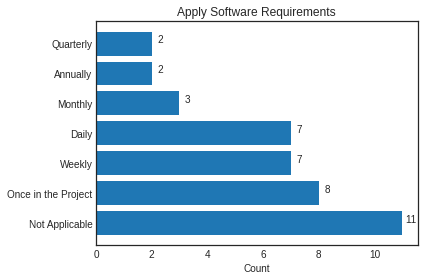

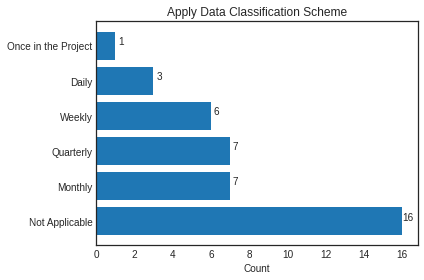

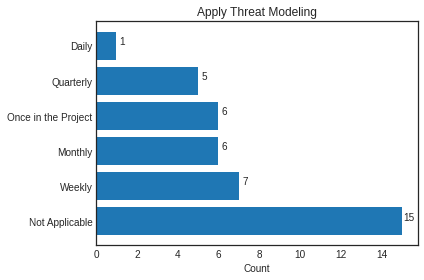

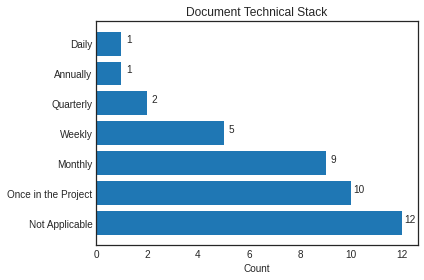

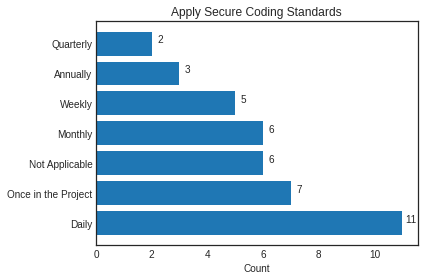

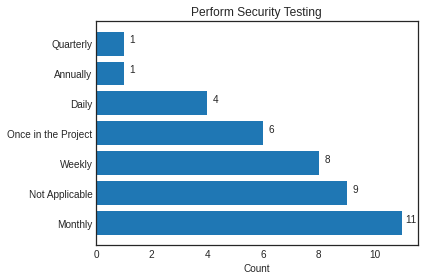

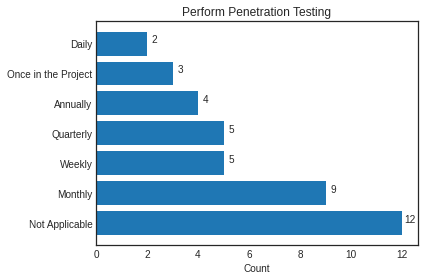

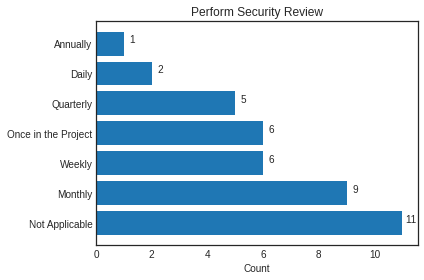

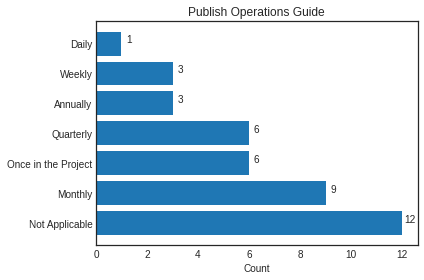

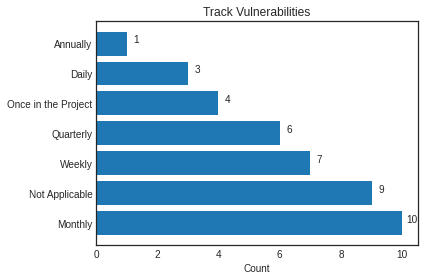

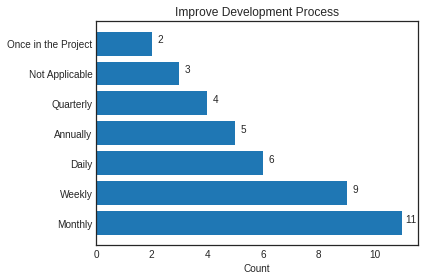

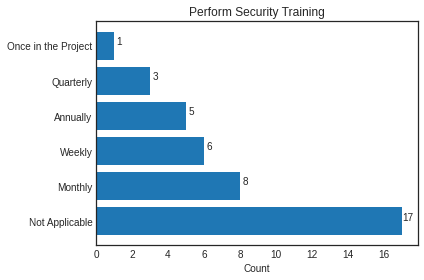

In [47]:
df_new =df_responses.iloc[:,9:21]
image_format = 'svg' # e.g .png, .svg, etc.

for col in df_new:
    figure, axis = plt.subplots()
    plot = axis.barh(df_new[col].value_counts().index, df_new[col].value_counts().values )
    plt.title(col)
    plt.xlabel('Count')
    plt.tight_layout() # to get full text labels when saving the figures
    calculate_bar_values(plot,axis)
    plt.show()
    image_name= col +'.svg'
    figure.savefig(image_name, format=image_format, dpi=1200)

In [ ]:
df_new =df_responses.iloc[:,9:21]
image_format = 'svg' # e.g .png, .svg, etc.
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
for col in df_new:
    ax = df_new[col].value_counts().sort_index().plot.barh(title=col)
    plt.xlabel('Count')
    plt.tight_layout() # to get full text labels when saving the figures
    plt.show()
    image_name= col +'.svg'

    fig.savefig(image_name, format=image_format, dpi=1200)

In [ ]:
df_responses.columns


Index(['Timestamp', 'gender', ' years of experience', 'qualification degree',
       ' Specialization', ' job title', 'IT Team Size', ' sector you work',
       'self-rate security knowledge', 'Apply Software Requirements',
       'Apply Data Classification Scheme', 'Apply Threat Modeling',
       'Document Technical Stack', 'Apply Secure Coding Standards',
       'Perform Security Testing', 'Perform Penetration Testing',
       'Perform Security Review', 'Publish Operations Guide',
       'Track Vulnerabilities', 'Improve Development Process',
       'Perform Security Training',
       'development methodology used in your project',
       'type development  you do', 'main priorities when doing development',
       'Do your priorities change when a deadline approaches? هل تتغير أولوياتك عندما يقترب الموعد النهائي؟',
       'security fit in your priorities',
       'Do you apply Security Tooling? If yes, What tools do you use? and in which SDLC phase? هل تطبق أدوات الأمن؟ إذا كانت الإج

# Development methodology used in your project bar chart

---



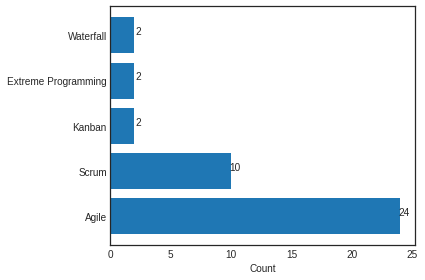

In [50]:
fig1, ax1 = plt.subplots()
plot_sw = ax1.barh(df_responses.iloc[:,21].value_counts().index, df_responses.iloc[:,21].value_counts().values )
plt.xlabel('Count')
plt.tight_layout() # to get full text labels when saving the figures
calculate_bar_values(plot_sw, ax1) # display values on bar head
plt.show()
image_name= 'sw_meth1.svg'
fig1.savefig(image_name, format=image_format, dpi=1200)

# Team Size per Sector Stacked Bar
